b)

In [1]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
model = BayesianNetwork([('S', 'O'), ('S', 'L'), ('L', 'M'), ('S', 'M')])

cpd_s = TabularCPD(variable='S', variable_card=2, values=[[0.6], [0.4]])  # P(S)
cpd_o = TabularCPD(variable='O', variable_card=2, 
                   values=[[0.9, 0.3], [0.1, 0.7]], 
                   evidence=['S'], evidence_card=[2])  # P(O|S)
cpd_l = TabularCPD(variable='L', variable_card=2, 
                   values=[[0.7, 0.2], [0.3, 0.8]], 
                   evidence=['S'], evidence_card=[2])  # P(L|S)
cpd_m = TabularCPD(variable='M', variable_card=2, 
                   values=[[0.8, 0.5, 0.4, 0.1], [0.2, 0.5, 0.6, 0.9]], 
                   evidence=['S', 'L'], evidence_card=[2, 2])  # P(M|S,L)

model.add_cpds(cpd_s, cpd_o, cpd_l, cpd_m)

In [10]:
assert model.check_model()

+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.0427 |
+------+----------+
| S(1) |   0.9573 |
+------+----------+


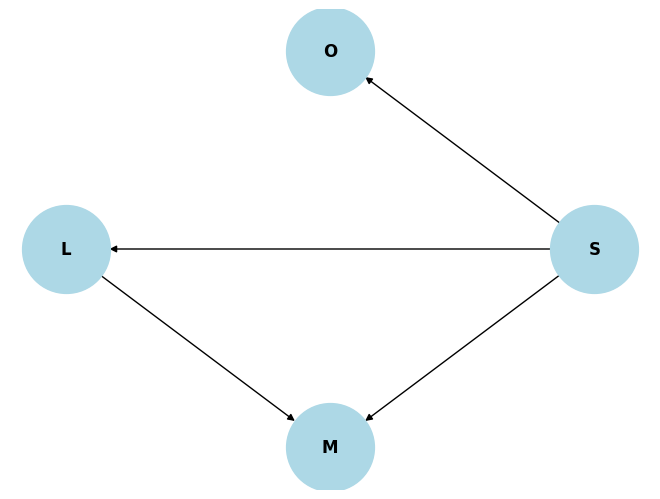

In [8]:
infer = VariableElimination(model)
result = infer.query(variables=['S'], evidence={'L': 1, 'M': 1, 'O': 1})
print(result)

pos = nx.circular_layout(model)
nx.draw(model, pos=pos, with_labels=True, node_size=4000, font_weight='bold', node_color='lightblue')
plt.show()

a) Observăm foarte ușor din grafic, că O este independent de L și M.